# Assignment 1

## Exploring data in Python

For this assignment I have provided a portion of the data from the [Institute of Museum and Library Services ](https://www.kaggle.com/datasets/imls/museum-directory) dataset. I've cleaned it up abit!

The assignment asks you to explore the data and provide some analysis and visualisations. It will mostly ask you to use approaches to data analysis and access that we have seen before, but also may involve doing a bit of further research into libraries like NumPy and MatplotLib.

Complete your answers in this Jupyter Notebook, highlighting which cell answers each question.

I have provided some code to load in and format the dataset, run this once at the beginning!

In [12]:
import numpy as np
import matplotlib.pyplot as plt

In [13]:
#dataset adapted from https://www.kaggle.com/datasets/imls/museum-directory
file = open('data/museums_parsed.tsv')
dataset = np.loadtxt(file, delimiter = "\t",  dtype = 'O')
headings = dataset[0]
dataset = dataset[1:]
dataset[:,3] = [float(x[:-2]) for x in dataset[:,3]]
dataset[:,4] = [float(x[:-2]) for x in dataset[:,4]]
dataset[:,5] = [float(x[:-2]) for x in dataset[:,5]]
dataset[:,6] = [float(x[:-2]) for x in dataset[:,6]]

In [14]:
headings

array(['Museum Name', 'Legal Name', 'Museum Type', 'Latitude',
       'Longitude', 'Income', 'Revenue'], dtype=object)

In [15]:
dataset[0]

array(['ALASKA AVIATION HERITAGE MUSEUM',
       'ALASKA AVIATION HERITAGE MUSEUM', 'HISTORY MUSEUM', 61.179,
       -149.972, 602912.0, 550236.0], dtype=object)

## Q1

How many museums have the same legal name and museum name?

In [16]:
museums_name = dataset[:,0]
legal_name = dataset[:,1]
# Counting the number of matches
same_names = np.sum (museums_name == legal_name)
print('Number of legal names and museum names that have the same museum：', same_names)


Number of legal names and museum names that have the same museum： 9313


## Q2

What is the most common type of museum? What percentage of the total items to they make up?

**HINT** What kind of ``Average`` is ``most common`` another word for?


In [17]:
from collections import Counter
type_museums = dataset[:,2]

# returns a list of the single most common element and extracts the most common museum type from this list
most_common=Counter(type_museums).most_common(1)[0][0] 
print('The most common type of museum:',most_common)

# Counts the occurrences of the most common museum type in the dataset.
most_common= np.count_nonzero(dataset[:, 2] == most_common)
# Calculates the percentage of the most common museum type in the dataset.
most_percentage = (most_common/len(type_museums))*100

print('The percentage of most common type of museum is :',most_percentage, '%')

The most common type of museum: HISTORIC PRESERVATION
The percentage of most common type of museum is : 55.57552340731422 %


## Q3

### Part 1

Plot income against revenue for the 1000 most easterly museums.  Pick sensible ticks and labels for the axes, as well as a sensible scale (given the range and outliers in the data).

Each item on the plot should have a different colour or symbol depending on its type as described by the ``museum type`` heading (there are 9 different types) .**EXTRA BONUS** If you can put in a legend mapping museum type to colour.

**HINT** Try using `NumPy Filters` and multiple calls to ``ax.plot()`` to plot each group.

### Part 2

What does this graph tell you about the relationship between revenue and income for institutes in the dataset?

Part1: 


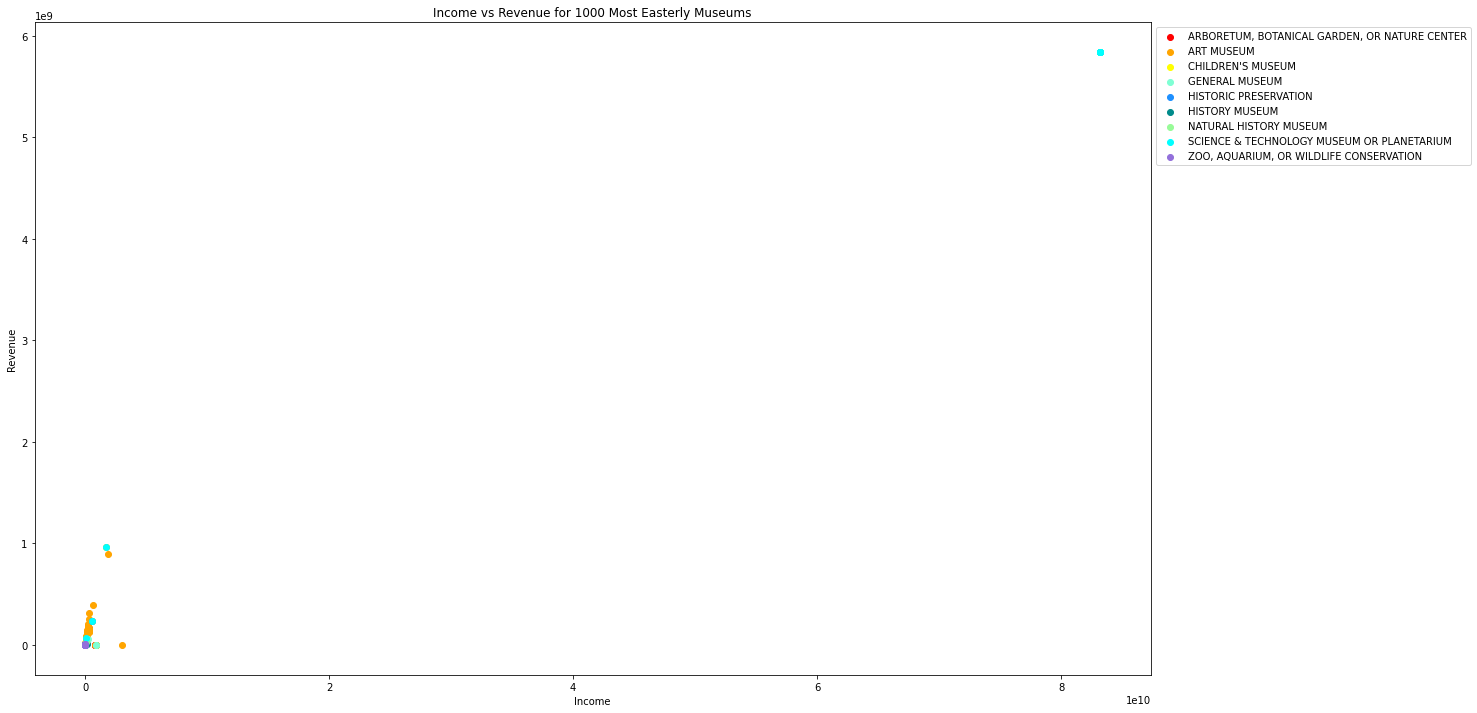

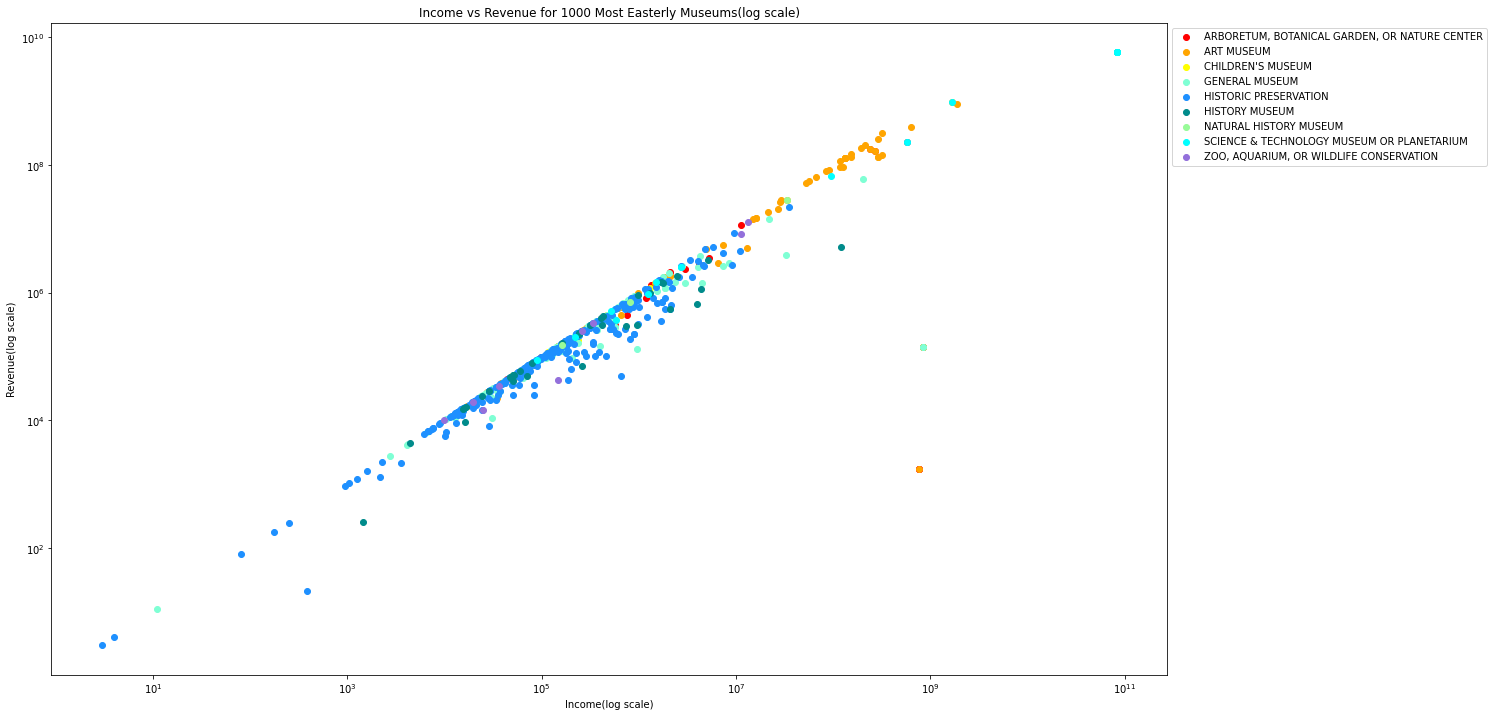

Part2: 
From these two charts, I can find that the income of museums is basically lower than or the same as revenue.


In [18]:
# Part1
longitude_museum = dataset[:,4]

# The 1000 most eastly museums.
most_eastly_museums_indices = np.argsort(longitude_museum)[-1000:]
most_eastly_museums = dataset[most_eastly_museums_indices]

# 9 different types and 9 different colors
unique_types = np.unique(type_museums)
color = ['red', 'orange','yellow','aquamarine','dodgerblue','darkcyan','palegreen','cyan','mediumpurple']

# Associate each museum type with a color.
type_museums = most_eastly_museums[:, 2]
income_museum = most_eastly_museums[:, 5]
revenue_museum = most_eastly_museums[:, 6]
unique_types = np.unique(type_museums)
type_colors = {
    unique_types[i]: color[i] for i in range(len(unique_types))
}

print('Part1: ')

# Draw the first chart: Scatter plot of Income vs Revenue for the 1000 most easterly museums.
fig, ax = plt.subplots(figsize=(20, 12))
for museum_type in unique_types:
    indices = np.where(type_museums == museum_type)
    type_income = income_museum[indices]
    type_revenue = revenue_museum[indices]
    ax.scatter(type_income, type_revenue, label=museum_type, color=type_colors[museum_type])

ax.legend(bbox_to_anchor=(1, 1), loc='upper left')
ax.set_xlabel('Income')
ax.set_ylabel('Revenue')
ax.set_title('Income vs Revenue for 1000 Most Easterly Museums')
plt.show()

# The first chart drawn does not show the information clearly enough.
# Draw the second chart: Scatter plot with logarithmic scale for both x and y axes to see the data display more clearly.
fig, ax = plt.subplots(figsize=(20, 12))
for museum_type in unique_types:
    index = np.where(type_museums == museum_type)
    type_income = income_museum[index]
    type_revenue = revenue_museum[index]
    ax.scatter(type_income, type_revenue, label=museum_type, color=type_colors[museum_type])

ax.legend(bbox_to_anchor=(1, 1), loc='upper left')
ax.set_xlabel('Income(log scale)')
ax.set_ylabel('Revenue(log scale)')
ax.set_title('Income vs Revenue for 1000 Most Easterly Museums(log scale)')
ax.set_xscale('log')
ax.set_yscale('log')
plt.show()

# Part2
print('''Part2: 
From these two charts, I can find that the income of museums is basically lower than or the same as revenue.''')

## Q4

1. Create a new 1-D array containing the absolute difference between revenue and income for each object. Plot this data as a histogram with 100 bins.

You will see there are a couple of issues we need to address first to make our plots more interprettable. **First**, lots of museums have similar incomes and revenues, meaning the **absolute difference between them is close to zero**. This means the first bin has most of the museums in it and the variation in the latter bins is squished into a small amount of space. **Second**, a few outliers have large differences between them, extending the range of the bins as they are equally spaced out between the top and bottom values. This leaves lots of bins covering a few datapoints at the top.


2. We can address these issues by using a ``log scale`` for the x axis. Pick some appropriately spaced ticks and plot the log histogram with 100 bins. Label the axes appropriately.

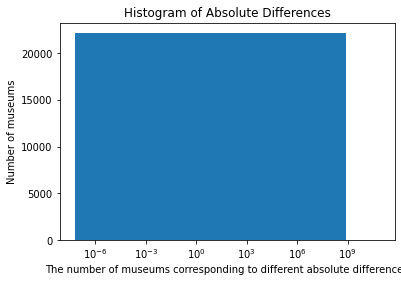

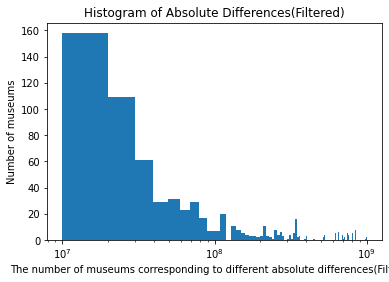

In [90]:
income_museum = dataset[:, 5]
revenue_museum = dataset[:, 6]
absolute_difference = np.abs(revenue_museum - income_museum)

# Plot a histogram with full data as a reference for post-screening
plt.hist(absolute_difference, bins=100)
plt.xscale('log')
plt.title('Histogram of Absolute Differences')
plt.xlabel('The number of museums corresponding to different absolute differences')
plt.ylabel('Number of museums')
plt.show()

# Confirm the filtering range based on the pictures taken before filtering
# Removing extreme values (close to zero and exceptionally large differences)
lower_threshold = 10**7
upper_threshold = 10**9
filtered_absolute = absolute_difference[(absolute_difference > lower_threshold) & (absolute_difference < upper_threshold)]

# Plotting the new histogram
plt.hist(filtered_absolute, bins=100)
plt.xscale('log')
plt.title('Histogram of Absolute Differences(Filtered)')
plt.xlabel('The number of museums corresponding to different absolute differences(Filtered)')
plt.ylabel('Number of museums')
plt.show()
